LightGBM Model Performance:
Accuracy: 0.9363
Precision: 0.9379
Recall: 0.9363
F1 Score: 0.9370

Classification Report:
                         precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00        95
     Coilia dussumieri       1.00      1.00      1.00        83
Otolithoides biauritus       0.74      0.78      0.76        94
     Otolithoides pama       1.00      0.99      0.99        87
     Pethia conchonius       1.00      1.00      1.00        95
  Polynemus paradiseus       1.00      1.00      1.00        91
  Puntius lateristriga       1.00      0.95      0.98        84
        Setipinna taty       0.73      0.73      0.73        96
 Sillaginopsis panijus       1.00      1.00      1.00        91

              accuracy                           0.94       816
             macro avg       0.94      0.94      0.94       816
          weighted avg       0.94      0.94      0.94       816



<Figure size 1000x600 with 0 Axes>

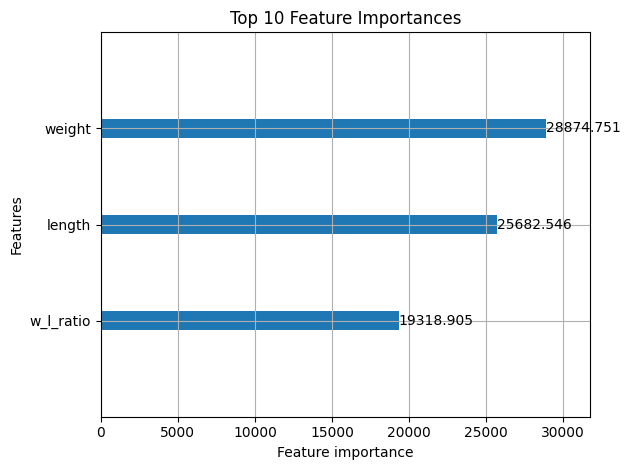

In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('7.csv')

X = data.drop("species", axis=1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data["species"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    objective='multiclass',
    num_class=len(np.unique(y)),
    random_state=42,
    verbosity=-1
)

lgb_model.fit(X_train, y_train)

lgb_preds = lgb_model.predict(X_test)

print("LightGBM Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, lgb_preds):.4f}")
print(f"Precision: {precision_score(y_test, lgb_preds, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, lgb_preds, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, lgb_preds, average='weighted'):.4f}")
print("\nClassification Report:\n", classification_report(y_test, lgb_preds, target_names=label_encoder.classes_))

plt.figure(figsize=(10, 6))
lgb.plot_importance(lgb_model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()